# `20180812a` - Getting one image ?

In [3]:
#!/usr/bin/python
import spidev
#import RPi.GPIO as GPIO
import time
import numpy as np
import matplotlib 
from scipy import signal
import matplotlib.pyplot as plt
import json
import time
from pyUn0 import *
from scipy import fftpack

Not loading RPi.GPIO as not on RPi


Data acquired


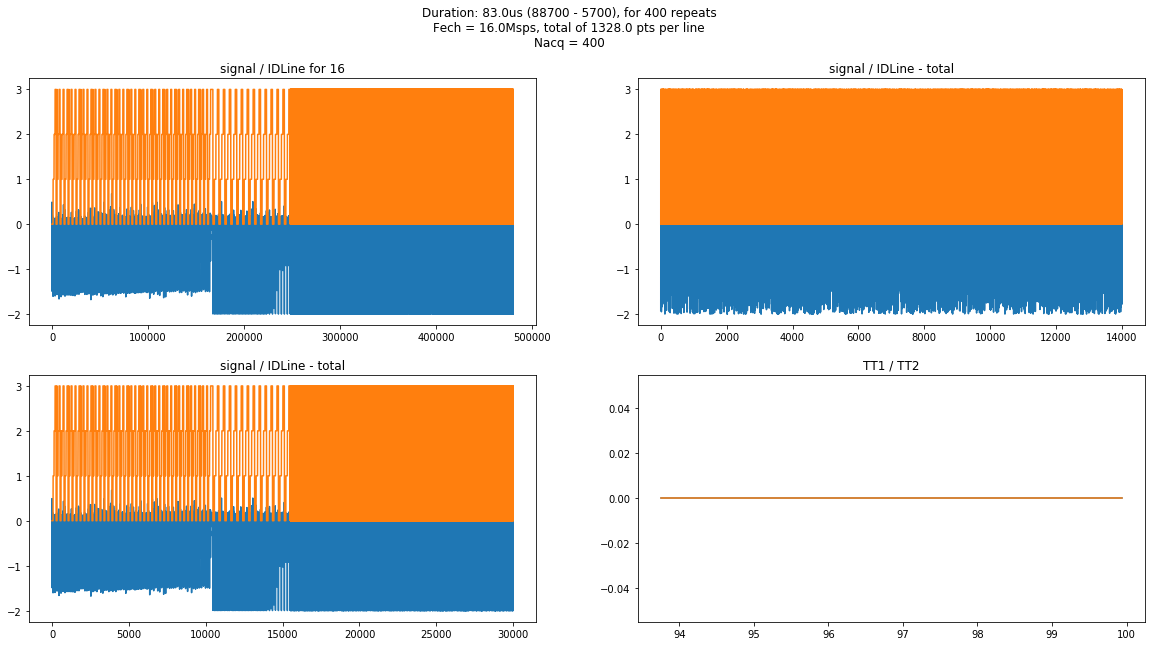

In [12]:
for FILE in ["data/20180812a-16.json"]:
    x = us_json()
    x.JSONprocessing(FILE)
    # row and column sharing
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,10))
    Duration = (x.parameters['LengthAcq']-x.parameters['DeltaAcq'])/1000.0
    Title = "Duration: "+str(Duration)+"us ("+str(x.parameters['LengthAcq'])+" - "
    Title+= str(x.parameters['DeltaAcq'])+"), for "+str(x.Nacq)
    Title += " repeats\n"
    Title += "Fech = "+str(x.f)+"Msps, total of "+str(float(x.f)*Duration)+" pts per line\n" 
    Title += "Nacq = "+str(x.Nacq)
    plt.suptitle(Title)
    #plt.figure()
    A = 4000
    B = 6000
    ax1.plot(x.tmp)
    ax1.plot(x.IDLine)
    ax1.set_title('signal / IDLine for '+str(x.N))
    A =340000
    ax2.plot(x.tmp[A:A+14000])
    ax2.plot(x.IDLine[A:A+14000])
    ax2.set_title('signal / IDLine - total')
    ax3.plot(x.t,x.tmp)
    ax3.plot(x.t,x.IDLine)
    ax3.set_title('signal / IDLine - total')
    ax4.plot(x.t[1500:1600],x.TT1[1500:1600])
    ax4.plot(x.t[1500:1600],x.TT2[1500:1600])
    ax4.set_title('TT1 / TT2')
    plt.show()
    #plt.tight_layout()
    FileName = "images/"+x.iD+"-"+str(x.N)+"-all.jpg"
    f.savefig(FileName)

In [13]:
#x.mkImg()

# Creating counters to know what lines are where

## It seems however to have an issue, lines are 2700 long instead of 108x32.

In [14]:
ID = []
Counter = 0
ps = 0
PS = []
L = []
for i in range(120000):
    if i < len(x.tmp) - 50:
        if (x.IDLine[i] ==  x.IDLine[i+1]) and  (x.IDLine[i] <> x.IDLine[i+2]):
            if (i - ps) > 500:
                L.append(i-ps)
                print Counter,i,L[-1]
                Counter = Counter + 1
                ps = i
                PS.append(i)
        else:
            ID.append(Counter)
    else:
        ID.append(-1)
        
del PS[0]
del ID[0]
del L[0]

0 1055 1055
1 2092 1037
2 3129 1037
3 4166 1037
4 5204 1038
5 6242 1038
6 7279 1037
7 8316 1037
8 9354 1038
9 10392 1038
10 11429 1037
11 12466 1037
12 13505 1039
13 14542 1037
14 15579 1037
15 16616 1037
16 17654 1038
17 18692 1038
18 19729 1037
19 20766 1037
20 21804 1038
21 22842 1038
22 23879 1037
23 24916 1037
24 25955 1039
25 26992 1037
26 28029 1037
27 29066 1037
28 30104 1038
29 31142 1038
30 32179 1037
31 33216 1037
32 34254 1038
33 35292 1038
34 36329 1037
35 37366 1037
36 38405 1039
37 39442 1037
38 40479 1037
39 41516 1037
40 42554 1038
41 43592 1038
42 44629 1037
43 45666 1037
44 46704 1038
45 47742 1038
46 48779 1037
47 49816 1037
48 50855 1039
49 51892 1037
50 52929 1037
51 53966 1037
52 55004 1038
53 56042 1038
54 57079 1037
55 58116 1037
56 59154 1038
57 60192 1038
58 61229 1037
59 62266 1037
60 63305 1039
61 64342 1037
62 65379 1037
63 66416 1037
64 67454 1038
65 68492 1038
66 69529 1037
67 70566 1037
68 71604 1038
69 72642 1038
70 73679 1037
71 74716 1037
72 75755 10

In [72]:
l = int(np.average(L[0:10]) - 4)
print l,len(PS)

1546 140


## Making the image

In [73]:
IMG = []
for k in range(len(PS)):
    IMG.append(x.tmp[PS[k]:PS[k]+l])

In [74]:
np.asarray(IMG)

array([[ 0.078125  , -0.3984375 ,  0.03515625, ...,  0.2421875 ,
         0.2109375 ,  0.19921875],
       [ 0.2109375 ,  0.2109375 ,  0.578125  , ...,  0.3515625 ,
         0.265625  , -0.1328125 ],
       [ 0.01953125, -0.23046875,  0.0703125 , ...,  0.18359375,
         0.015625  ,  0.35546875],
       ..., 
       [ 0.046875  ,  0.04296875,  0.03515625, ...,  0.0390625 ,
         0.0234375 ,  0.03125   ],
       [ 0.03125   ,  0.03125   ,  0.03125   , ..., -0.01171875,
        -0.34765625,  0.078125  ],
       [ 0.234375  , -0.6484375 ,  0.13671875, ...,  0.02734375,
         0.03125   ,  0.1953125 ]])

In [75]:
X,Y = np.shape(IMG)
IMGLINE = np.reshape(IMG, X*Y)
X,Y

(140, 1546)

## Filtering the image

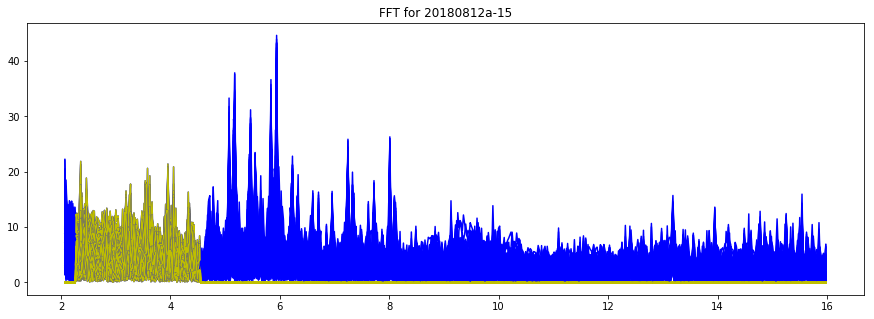

In [76]:
Filtered = []
plt.figure(figsize=(15,5))
plt.title("FFT for "+x.iD+"-"+str(x.N))
for p in range(X):

    FFT = np.fft.fft(IMG[p])
    L = len(FFT)
    Frq = [32.0*k/L for k in range(L)]
    plt.plot(Frq[100:L/2],np.abs(FFT)[100:L/2],"b")
    
    FFTFiltered = FFT    
    for fff in range(L/2+1):
        if Frq[fff] < 0.65*3.5 or Frq[fff] > 1.3*3.5:
            FFTFiltered[fff] = 0
            FFTFiltered[-fff] = 0
    Filtered.append(np.real(np.fft.ifft(FFTFiltered)))
    plt.plot(Frq[100:L/2],np.abs(FFTFiltered)[100:L/2],"y")
plt.show()
FileName = "images/FFT"+x.iD+"-"+str(x.N)+"-wirephantom.jpg"
#plt.savefig(FileName)

In [77]:
Nl = len(Filtered[1])
NFFT = fftpack.helper.next_fast_len(Nl)
print NFFT

1600


In [78]:
%timeit np.abs(signal.hilbert(Filtered[2],N=NFFT))

The slowest run took 4.10 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 129 µs per loop


In [79]:
%timeit np.abs(signal.hilbert(Filtered[1]))

100 loops, best of 3: 2.61 ms per loop


In [80]:
H = []
for i in range(X):
    H.append( np.asarray(np.abs(signal.hilbert(Filtered[i],N=NFFT))) )


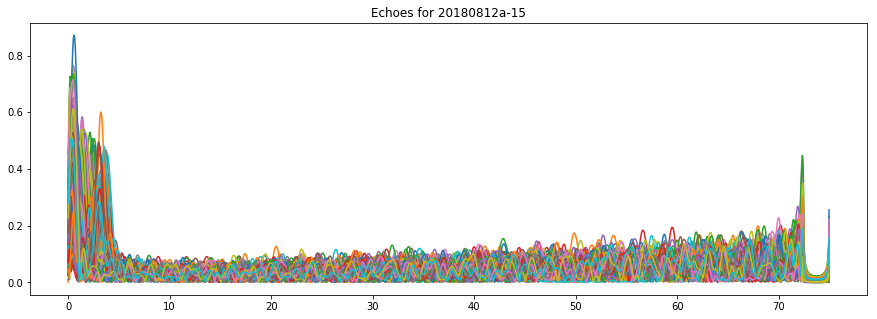

In [81]:
plt.figure(figsize=(15,5))
plt.title("Echoes for "+x.iD+"-"+str(x.N))
for i in range(X):
    plt.plot(x.t[0:len(H[i])],H[i])
plt.show()
FileName = "images/echoes-"+x.iD+"-"+str(x.N)+"-wirephantom.jpg"
plt.savefig(FileName)

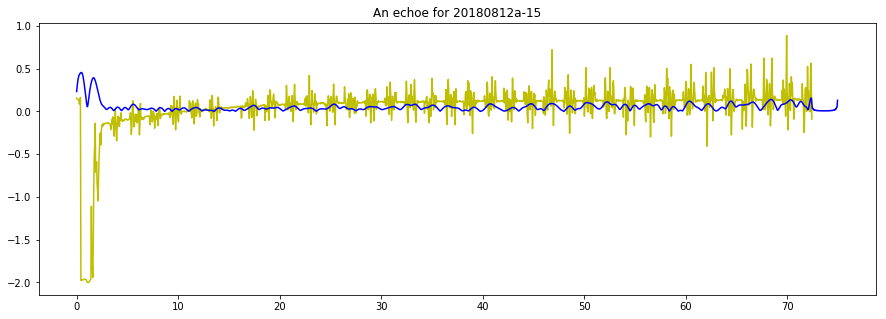

In [82]:
plt.figure(figsize=(15,5))
plt.title("An echoe for "+x.iD+"-"+str(x.N))
plt.plot(x.t[0:len(IMG[60])],IMG[60],"y")
plt.plot(x.t[0:len(H[60])],H[60],"b")
plt.show()
FileName = "images/echoe-"+x.iD+"-"+str(x.N)+"-wirephantom.jpg"
plt.savefig(FileName)

## Making the image

In [83]:
y0 = signal.decimate(H, int(32*1.33), 3)

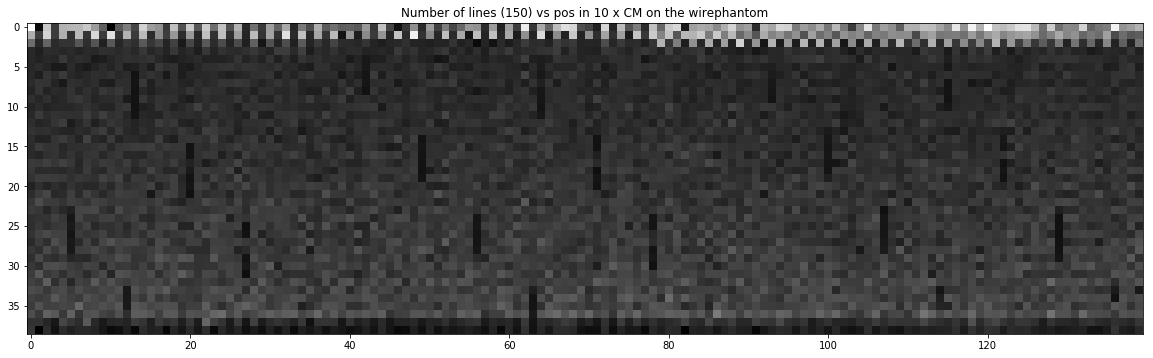

In [84]:
plt.figure(figsize=(20,10))
plt.title ("Number of lines (150) vs pos in 10 x CM on the wirephantom")
plt.imshow(np.transpose(np.sqrt(y0+0.1)),cmap='gray')
plt.show()
FileName = "image-"+x.iD+"-"+str(x.N)+"-wirephantom.png"
#plt.savefig(FileName)
plt.imsave(FileName,np.transpose(np.sqrt(y0+0.1)))

In [85]:
x.parameters

{u'DeltaAcq': 5700,
 u'DeltaAcq_Real': 570,
 u'LengthAcq': 98700,
 u'LengthAcq_Real': 9870,
 u'PeriodAcq': 2000000,
 u'PeriodAcq_Real': 200000,
 u'Poff': 2500,
 u'Poff_Real': 250,
 u'Pon': 200,
 u'Pon_Real': 20,
 u'PulsesDelay': 300,
 u'PulsesDelay_Real': 30}